In [1]:
import numpy as np, pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt, seaborn as sns
import scipy
import warnings
import plotly.express as px
from itertools import product
import statsmodels.api as sm
import datetime
from tqdm import tqdm
warnings.filterwarnings('ignore')

In [2]:
#Loading Data
data = pd.read_csv('/Users/user/Desktop/idsFinalProject/country_vaccinations.csv')

In [3]:
data

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26233,Zimbabwe,ZWE,2021-06-18,1131397.0,700244.0,431153.0,5310.0,4935.0,7.61,4.71,2.90,332.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1407427595...
26234,Zimbabwe,ZWE,2021-06-19,1133920.0,701348.0,432572.0,2523.0,4360.0,7.63,4.72,2.91,293.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1407427595...
26235,Zimbabwe,ZWE,2021-06-20,1138733.0,703065.0,435668.0,4813.0,4525.0,7.66,4.73,2.93,304.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1407427595...
26236,Zimbabwe,ZWE,2021-06-21,1140852.0,704001.0,436851.0,2119.0,4664.0,7.68,4.74,2.94,314.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1407427595...


In [4]:
data.shape

(26238, 15)

In [5]:
#Checking Missing Data
data.isna().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     11490
people_vaccinated                      12267
people_fully_vaccinated                14959
daily_vaccinations_raw                 14048
daily_vaccinations                       273
total_vaccinations_per_hundred         11490
people_vaccinated_per_hundred          12267
people_fully_vaccinated_per_hundred    14959
daily_vaccinations_per_million           273
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [6]:
data = data.drop(data[data.total_vaccinations.isna()].index)

In [7]:
data.isna().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                        0
people_vaccinated                       921
people_fully_vaccinated                3509
daily_vaccinations_raw                 2558
daily_vaccinations                      217
total_vaccinations_per_hundred            0
people_vaccinated_per_hundred           921
people_fully_vaccinated_per_hundred    3509
daily_vaccinations_per_million          217
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [8]:
check_data = data.drop(data[data.people_vaccinated.isna()].index)

In [9]:
check_data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,NaN,NaN,1367.0,0.02,0.02,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
22,Afghanistan,AFG,2021-03-16,54000.0,54000.0,NaN,NaN,2862.0,0.14,0.14,NaN,74.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
44,Afghanistan,AFG,2021-04-07,120000.0,120000.0,NaN,NaN,3000.0,0.31,0.31,NaN,77.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
59,Afghanistan,AFG,2021-04-22,240000.0,240000.0,NaN,NaN,8000.0,0.62,0.62,NaN,206.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/


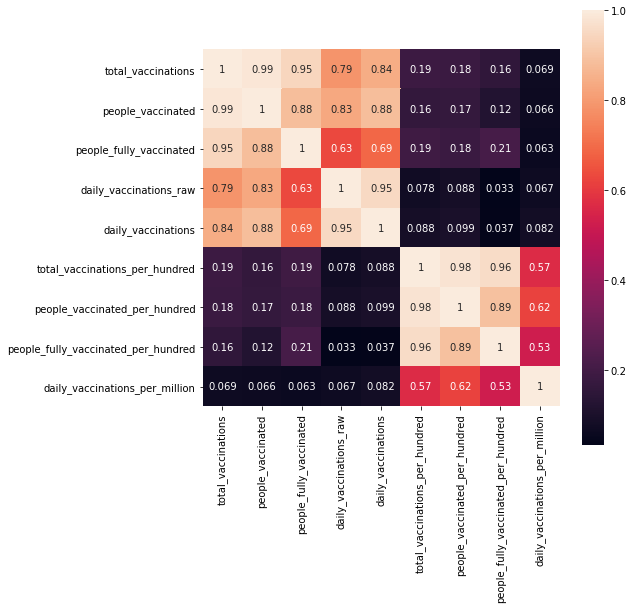

In [10]:
#As can bee seen from data, the values of total_vaccinations column are mostly the same as people_vaccenated column's.
#Also can bee seen from the heatmap, these features have almost ideal correlation.
plt.subplots(figsize=(8, 8))
sns.heatmap(check_data.corr(), annot=True, square=True)
plt.show()

In [11]:
#filling the missing values with the difference of these column's mean values.
diff = check_data.total_vaccinations.mean() - check_data.people_vaccinated.mean()
diff_per_hundred = check_data.total_vaccinations_per_hundred.mean() - check_data.people_vaccinated_per_hundred.mean()

data.people_vaccinated = data.people_vaccinated.fillna(data.total_vaccinations - diff)
data.people_vaccinated_per_hundred = data.people_vaccinated_per_hundred.fillna(data.total_vaccinations_per_hundred - diff_per_hundred)

In [12]:
data.isna().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                        0
people_vaccinated                         0
people_fully_vaccinated                3509
daily_vaccinations_raw                 2558
daily_vaccinations                      217
total_vaccinations_per_hundred            0
people_vaccinated_per_hundred             0
people_fully_vaccinated_per_hundred    3509
daily_vaccinations_per_million          217
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [13]:
#daily_vaccinations and daily_vaccinations_per_million greatly correlates with people_vaccinated and people_vaccinated_per_hundred.
#So, just fill missing values with zeros.
data.daily_vaccinations = data.daily_vaccinations.fillna(0)
data.daily_vaccinations_per_million = data.daily_vaccinations_per_million.fillna(0)

In [14]:
data.isna().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                        0
people_vaccinated                         0
people_fully_vaccinated                3509
daily_vaccinations_raw                 2558
daily_vaccinations                        0
total_vaccinations_per_hundred            0
people_vaccinated_per_hundred             0
people_fully_vaccinated_per_hundred    3509
daily_vaccinations_per_million            0
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [15]:
#people_fully_vaccinated and people_fully_vaccinated_per_hundred greatly correlates with total_vaccinations and total_vaccinations_per_hundred.
#Just filling missing values with 0.
data.people_fully_vaccinated = data.people_fully_vaccinated.fillna(0)
data.people_fully_vaccinated_per_hundred = data.people_fully_vaccinated_per_hundred.fillna(0)

In [16]:
data.isna().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                        0
people_vaccinated                         0
people_fully_vaccinated                   0
daily_vaccinations_raw                 2558
daily_vaccinations                        0
total_vaccinations_per_hundred            0
people_vaccinated_per_hundred             0
people_fully_vaccinated_per_hundred       0
daily_vaccinations_per_million            0
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [17]:
#daily_vaccinations_raw greatly correlates with daily_vaccinations.
#Just filling missing values with 0.
data.daily_vaccinations_raw = data.daily_vaccinations_raw.fillna(0)

In [18]:
data.isna().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

In [19]:
#finding out which countries have missing iso-code.
data[data.iso_code.isna()].country.unique()

array([], dtype=object)

In [20]:
#filling missing iso-codes with appropriate ones.
data[data.country == 'England'] = data[data.country == 'England'].fillna('GB-ENG')
data[data.country == 'Northern Ireland'] == data[data.country == 'Northern Ireland'].fillna('GB-NIR')
data[data.country == 'Scotland'] = data[data.country == 'Scotland'].fillna('GB-SCT')
data[data.country == 'Wales'] = data[data.country == 'Wales'].fillna('GB-WLS')
data = data.fillna('NC')

In [21]:
data.isna().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

<h1>Visualizations</h1>

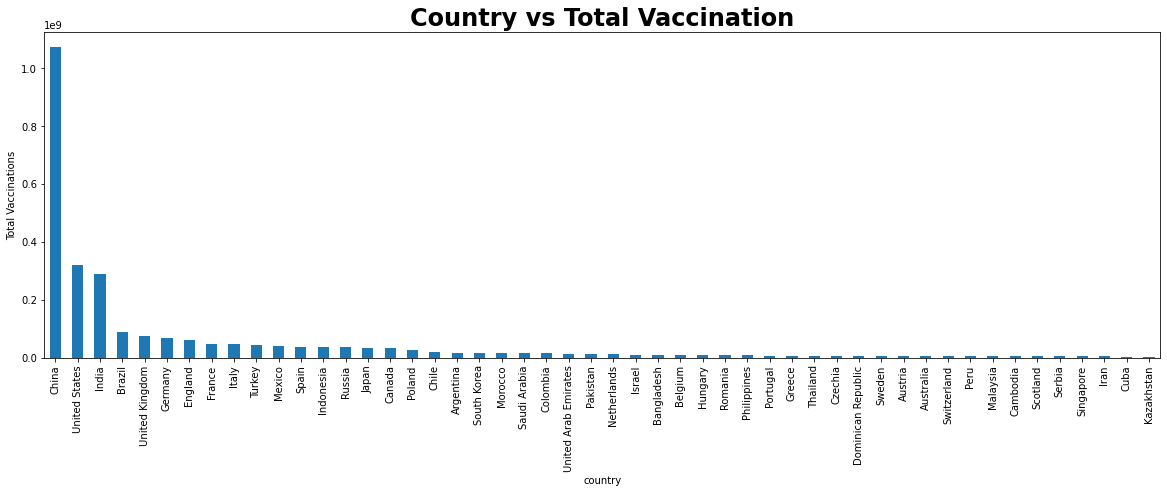

In [22]:
plt.figure(figsize=(20, 6))
data.groupby('country')['total_vaccinations'].max().sort_values(ascending=False)[:50].plot(kind='bar');
plt.title('Country vs Total Vaccination', fontsize=24, fontweight='bold')
plt.ylabel('Total Vaccinations');

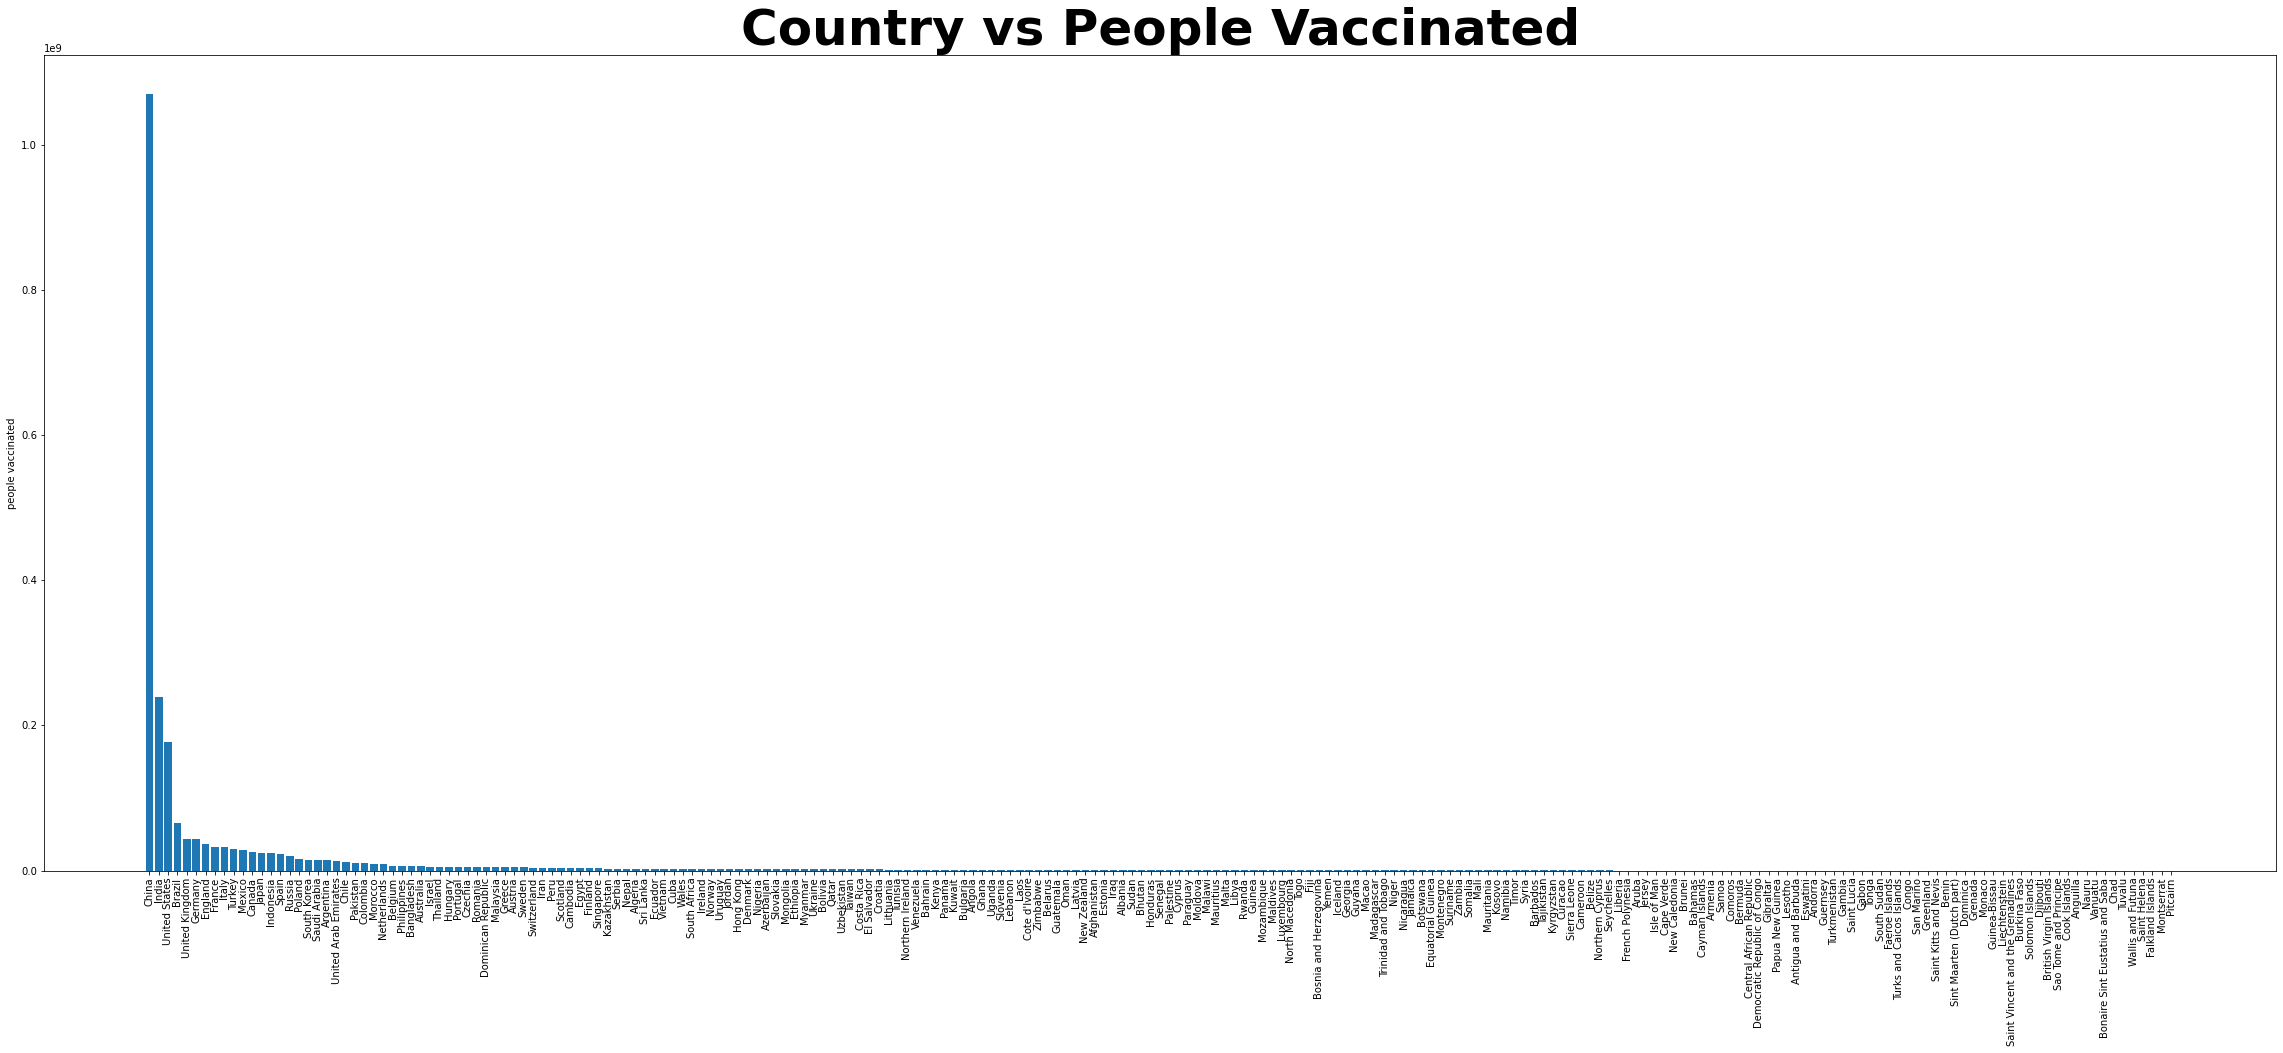

In [23]:
plt.figure(figsize=(40, 15))
data1 = data.groupby('country')['people_vaccinated'].max().sort_values(ascending=False)
plt.bar(data1.index, data1);
plt.xticks(rotation='90')
plt.yticks()
plt.title('Country vs People Vaccinated', fontsize=50, fontweight='bold')
plt.ylabel('people vaccinated');

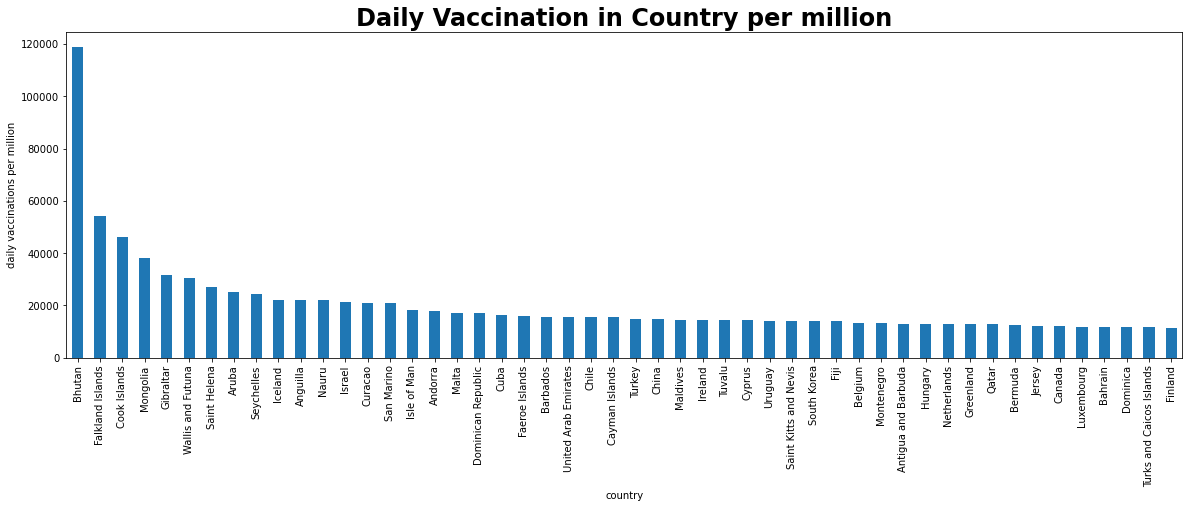

In [24]:
plt.figure(figsize=(20, 6))
data.groupby('country')['daily_vaccinations_per_million'].max().sort_values(ascending=False)[:50].plot(kind='bar')
plt.ylabel('daily vaccinations per million')
plt.title('Daily Vaccination in Country per million', fontsize=24, fontweight='bold');

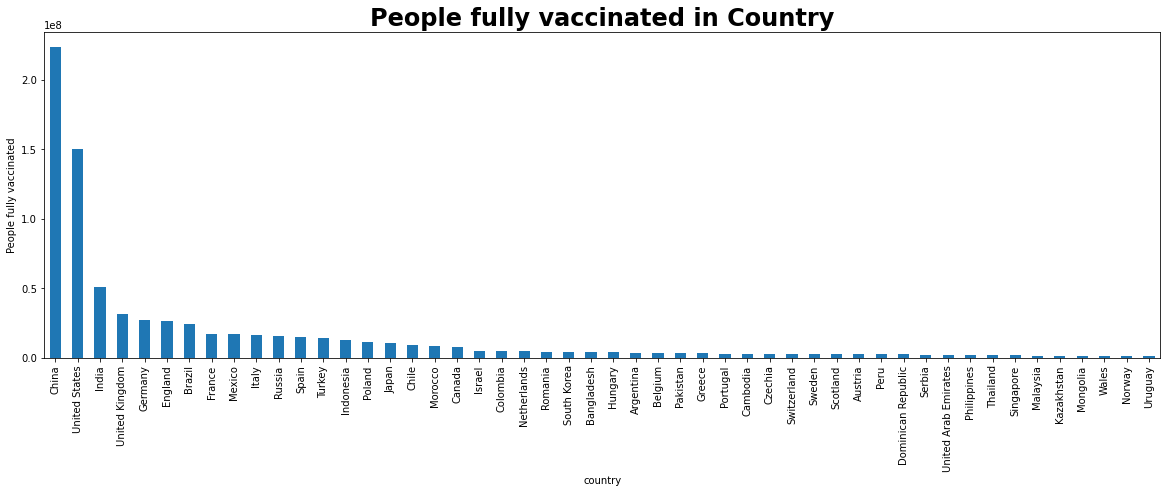

In [25]:
plt.figure(figsize=(20, 6))
data.groupby('country')['people_fully_vaccinated'].max().sort_values(ascending=False)[:50].plot(kind='bar')
plt.ylabel('People fully vaccinated')
plt.title('People fully vaccinated in Country', fontsize=24, fontweight='bold');

<h1>Working on just Data related to Pakistan</h1>

In [26]:
#Sorting out Pakistan's Data from the complete dataset
df_pak = data[ data['country'] == 'Pakistan' ]

In [27]:
df_pak.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
18114,Pakistan,PAK,2021-02-02,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,"CanSino, Oxford/AstraZeneca, Sinopharm/Beijing...",National Command and Operation Centre,https://ncoc.gov.pk/covid-vaccination-en.php
18122,Pakistan,PAK,2021-02-10,27228.0,27228.0,0.0,0.0,3404.0,0.01,0.01,0.0,15.0,"CanSino, Oxford/AstraZeneca, Sinopharm/Beijing...",National Command and Operation Centre,https://ncoc.gov.pk/covid-vaccination-en.php
18129,Pakistan,PAK,2021-02-17,52768.0,52768.0,0.0,0.0,3649.0,0.02,0.02,0.0,17.0,"CanSino, Oxford/AstraZeneca, Sinopharm/Beijing...",National Command and Operation Centre,https://ncoc.gov.pk/covid-vaccination-en.php
18133,Pakistan,PAK,2021-02-21,72882.0,72882.0,0.0,0.0,4437.0,0.03,0.03,0.0,20.0,"CanSino, Oxford/AstraZeneca, Sinopharm/Beijing...",National Command and Operation Centre,https://ncoc.gov.pk/covid-vaccination-en.php
18154,Pakistan,PAK,2021-03-14,350000.0,350000.0,0.0,0.0,13196.0,0.16,0.16,0.0,60.0,"CanSino, Oxford/AstraZeneca, Sinopharm/Beijing...",National Command and Operation Centre,https://ncoc.gov.pk/covid-vaccination-en.php


In [28]:
df_pak.isnull().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

No need to drop any values as no Na values

<h1>Visualizations of Pakistan's Dataset</h1>

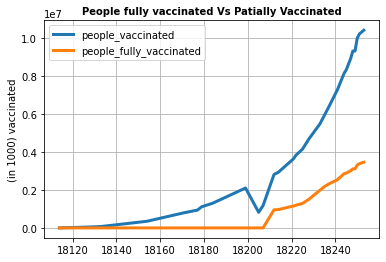

In [29]:
df_pak[['people_vaccinated', 'people_fully_vaccinated']].plot(ylabel = '(in 1000) vaccinated', linewidth = 3)
plt.grid()
plt.title('People fully vaccinated Vs Patially Vaccinated', fontsize=10, fontweight='bold');

Text(0, 0.5, 'Total Vaccinations')

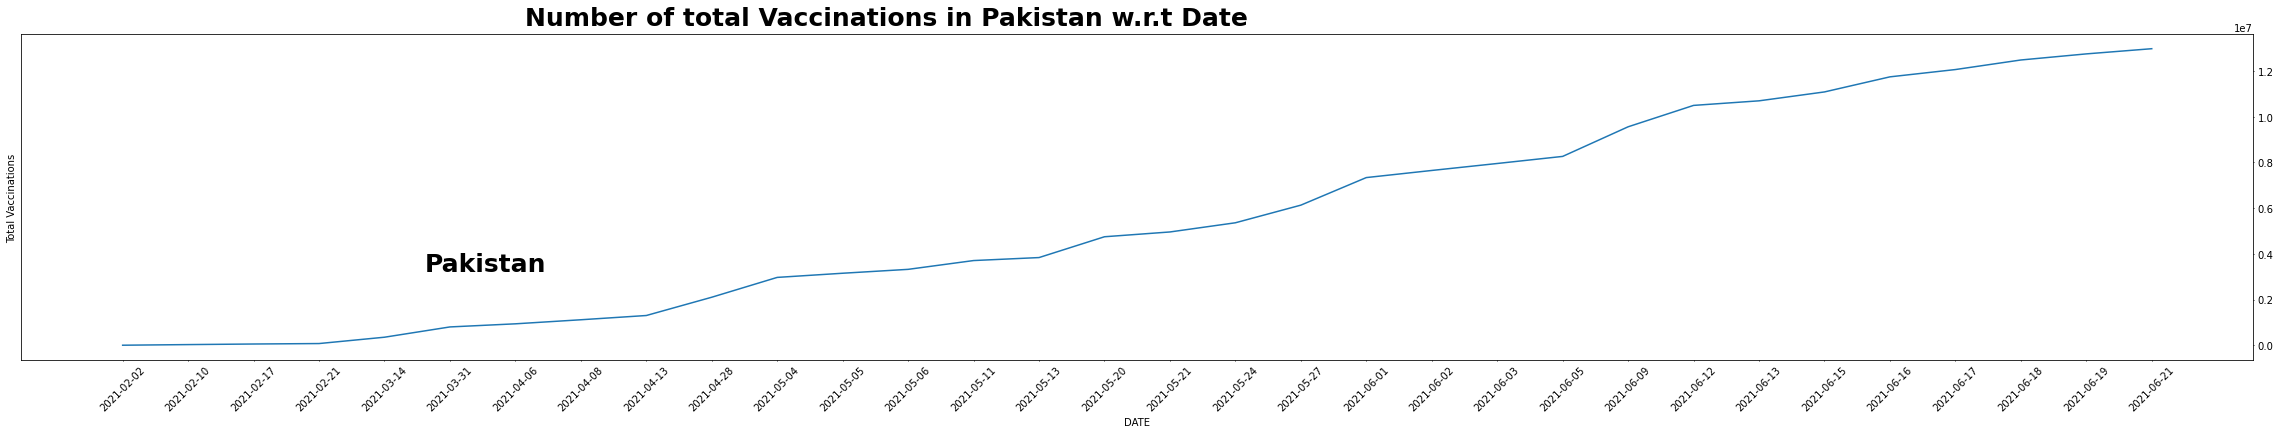

In [30]:
fig, ax = plt.subplots(1,1, figsize=(40,6))

g1 = sns.lineplot(x=df_pak['date'],y=df_pak['total_vaccinations'])

fig.text(0.3, 0.9, 'Number of total Vaccinations in Pakistan w.r.t Date', 
       fontsize=25, fontweight='bold',color='black')
fig.text(0.265, 0.33, 'Pakistan', 
        fontsize=25, fontweight='bold')
ax.yaxis.tick_right()
ax.tick_params(length=1)
plt.xlabel('DATE')
plt.xticks(rotation=45) 
plt.ylabel('Total Vaccinations')

Text(0, 0.5, 'Daily Vaccinations per Million')

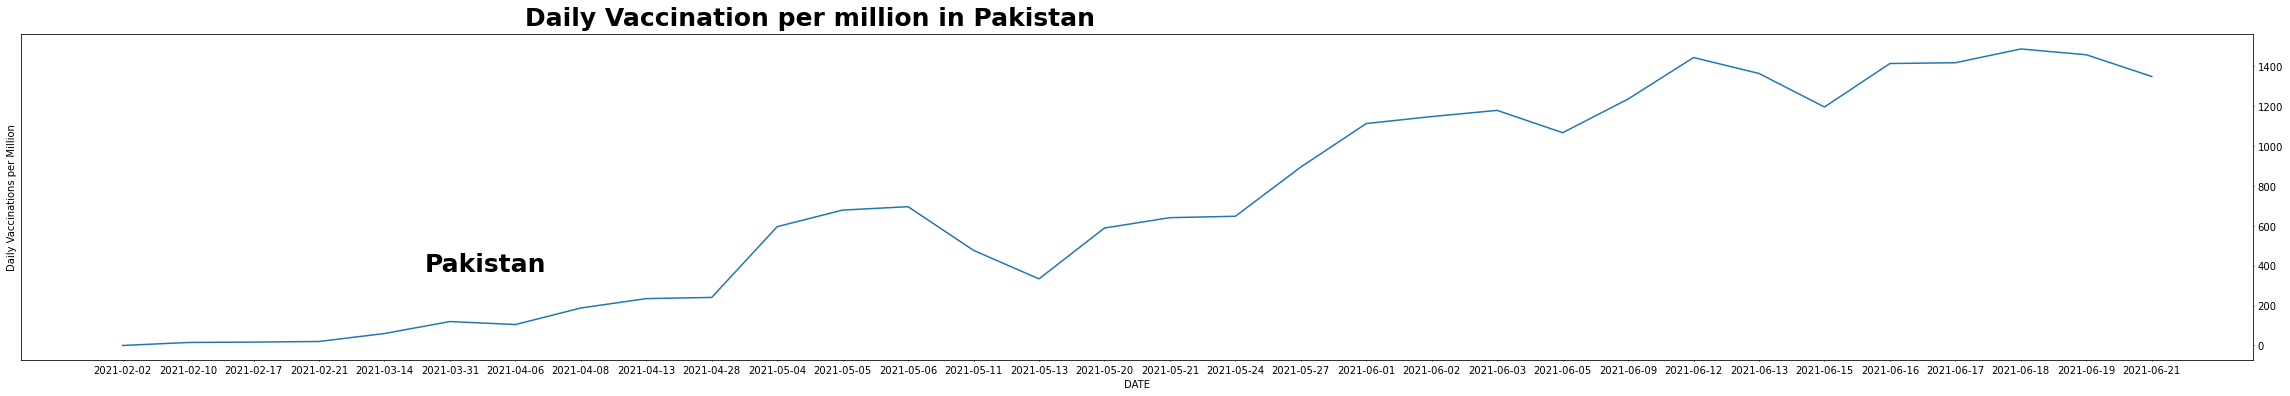

In [31]:
fig, ax = plt.subplots(1,1, figsize=(40,6))

g1 = sns.lineplot(x=df_pak['date'],y=df_pak['daily_vaccinations_per_million'])

fig.text(0.3, 0.9, 'Daily Vaccination per million in Pakistan', 
       fontsize=25, fontweight='bold',color='black')
fig.text(0.265, 0.33, 'Pakistan', 
        fontsize=25, fontweight='bold')
plt.xticks()
ax.yaxis.tick_right()
ax.tick_params(length=1)
plt.xlabel('DATE')
plt.ylabel('Daily Vaccinations per Million')

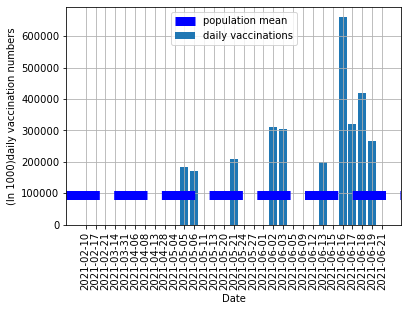

In [32]:
plt.bar(df_pak['date'][1:], df_pak['daily_vaccinations_raw'][1:], label = 'daily vaccinations')
plt.xlabel('Date')
plt.ylabel('(In 1000)daily vaccination numbers')
plt.axhline(y = np.mean(df_pak['daily_vaccinations_raw']), color = 'blue', ls = '--', linewidth = 9, label = 'population mean')
plt.legend(loc = 9)
plt.xticks(rotation = 90)
plt.grid()